In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
from matplotlib.ticker import FuncFormatter

import seaborn as sns

import numpy as np
import pandas as pd

In [17]:
data= pd.read_csv("tested.csv")


In [18]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [19]:
data.shape

(418, 12)

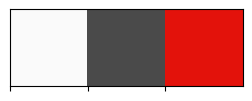

In [20]:
sns.palplot(['#fafafa', '#4a4a4a', '#e3120b'])

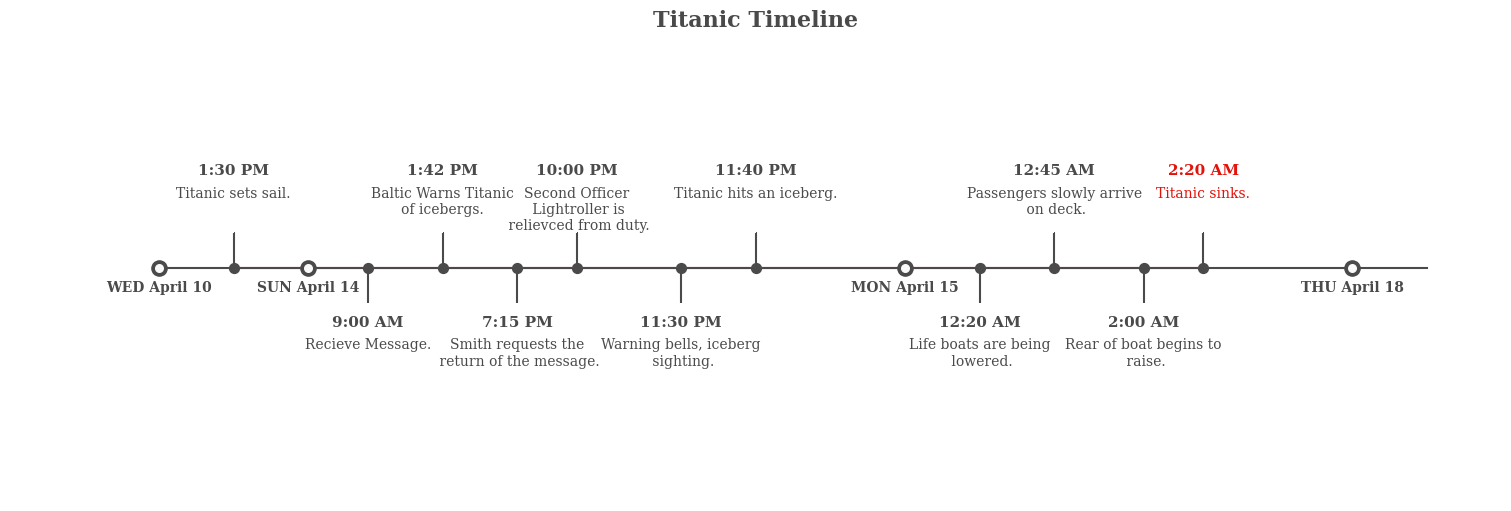

In [21]:
from datetime import datetime


tl_dates = [
    "WED April 10",
    "SUN April 14",
    "MON April 15",
    "THU April 18"
]

tl_x = [1, 2, 6, 9]

tl_sub_x = [1.5, 2.4, 2.9, 3.4, 3.8, 4.5, 5.0, 6.5, 7, 7.6, 8]
tl_sub_times = [
    "1:30 PM",
    "9:00 AM",
    "1:42 PM",
    "7:15 PM",
    "10:00 PM",
    "11:30 PM",
    "11:40 PM",
    "12:20 AM",
    "12:45 AM",
    "2:00 AM",
    "2:20 AM",
]

tl_text = [
    "Titanic sets sail.",
    "Recieve Message.",
    "Baltic Warns Titanic\nof icebergs.", 
    "Smith requests the\n return of the message.",
    "Second Officer\n Lightroller is\n relievced from duty.",
    "Warning bells, iceberg\n sighting.",
    "Titanic hits an iceberg.",
    "Life boats are being\n lowered.",
    "Passengers slowly arrive\n on deck.",
    "Rear of boat begins to\n raise.",
    "Titanic sinks."
]

# Set figure & Axes
fig, ax = plt.subplots(figsize=(15, 5), constrained_layout=True)
ax.set_ylim(-2, 2)
ax.set_xlim(0, 10)


# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.95, c='#4a4a4a', zorder=1)
# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a',zorder=4)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.2, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a')
    

# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' if idx!=len(tl_sub_x) else '#e3120b', fontsize=11)
    
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', 
        fontfamily='serif',color='#4a4a4a' if idx!=len(tl_sub_x) else '#e3120b')

# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([]) 

# Title
ax.set_title("Titanic Timeline", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')

plt.show()



In [22]:
fig = plt.figure(figsize=(12, 8))
data.Sex

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object

<Figure size 1200x800 with 0 Axes>

In [23]:
data= pd.read_csv("tested.csv")

In [24]:
data.Sex.map({'male':1, 'female':0})
data['Sex']= data.Sex.map({'male':1, 'female':0})
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


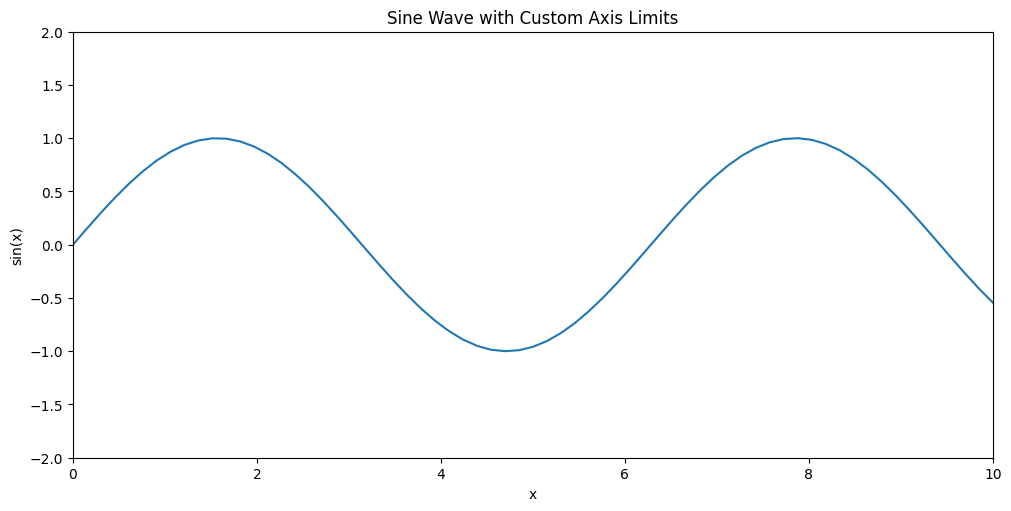

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Create data
x = np.linspace(0, 15, 100)
y = np.sin(x)

# Plot with customized limits
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.plot(x, y)
ax.set_title("Sine Wave with Custom Axis Limits")
ax.set_xlabel("x")
ax.set_ylabel("sin(x)")

# Set custom axis limits
ax.set_ylim(-2, 2)  # Y-axis from -2 to 2
ax.set_xlim(0, 10)  # X-axis from 0 to 10

plt.show()

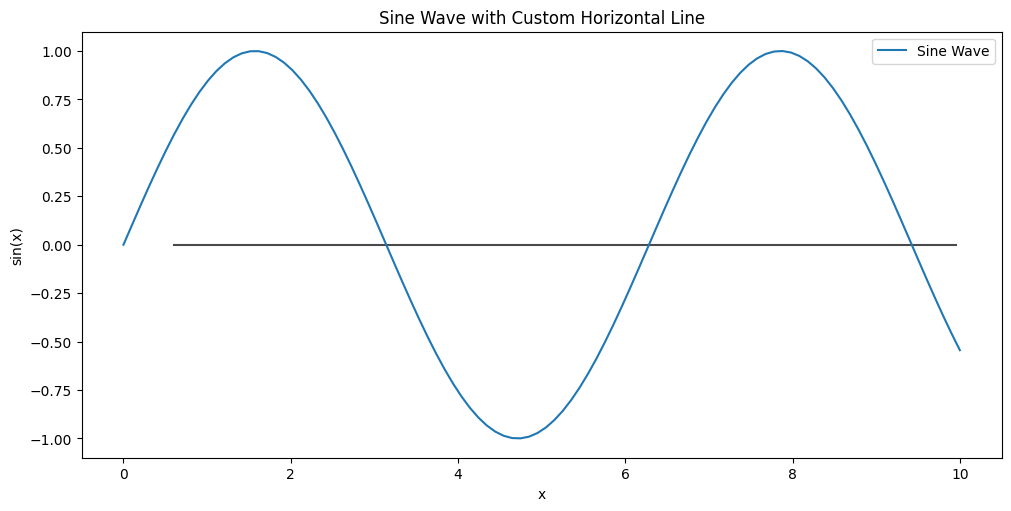

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Create data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Plot
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.plot(x, y, label="Sine Wave", zorder=2)

# Add a horizontal line at y = 0, with customized positioning and color
ax.axhline(0, xmin=0.1, xmax=0.95, c='#4a4a4a', zorder=1)
ax.set_title("Sine Wave with Custom Horizontal Line")
ax.set_xlabel("x")
ax.set_ylabel("sin(x)")

plt.legend()
plt.show()


Text(0.5, 1.0, 'Titanic Timeline')

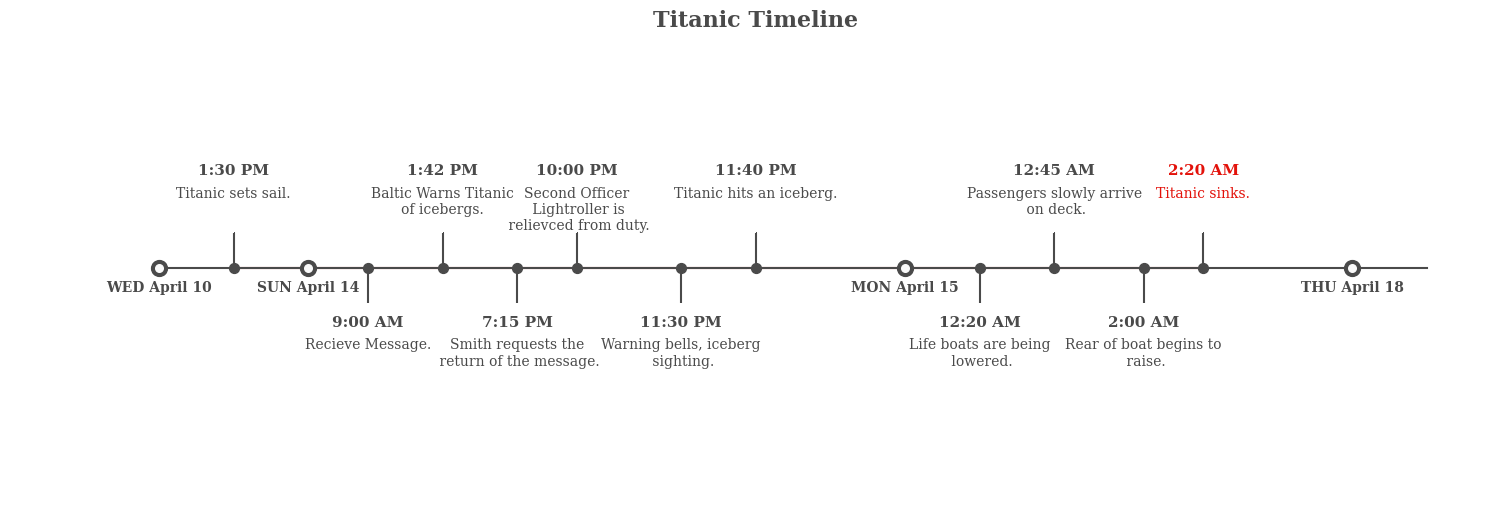

In [28]:
#Timeline Visualisation

tl_dates = [
    "WED April 10",
    "SUN April 14",
    "MON April 15",
    "THU April 18"
]

tl_x = [1, 2, 6, 9]

tl_sub_x = [1.5, 2.4, 2.9, 3.4, 3.8, 4.5, 5.0, 6.5, 7, 7.6, 8]
tl_sub_times = [
    "1:30 PM",
    "9:00 AM",
    "1:42 PM",
    "7:15 PM",
    "10:00 PM",
    "11:30 PM",
    "11:40 PM",
    "12:20 AM",
    "12:45 AM",
    "2:00 AM",
    "2:20 AM",
]

tl_text = [
    "Titanic sets sail.",
    "Recieve Message.",
    "Baltic Warns Titanic\nof icebergs.", 
    "Smith requests the\n return of the message.",
    "Second Officer\n Lightroller is\n relievced from duty.",
    "Warning bells, iceberg\n sighting.",
    "Titanic hits an iceberg.",
    "Life boats are being\n lowered.",
    "Passengers slowly arrive\n on deck.",
    "Rear of boat begins to\n raise.",
    "Titanic sinks."
]


#set figure and axis
fig, ax = plt.subplots(figsize=(15,5), constrained_layout=True)
ax.set_ylim(-2,2)
ax.set_xlim(0,10)

#the line
ax.axhline(0, xmin=0.1, xmax=0.95, c='#4a4a4a', zorder=1)

#the datepoints on the line
ax.scatter(tl_x, np.zeros(len(tl_x)), s=130,c='#4a4a4a', zorder=2 )
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)

#the timepoints
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a', zorder=4 )

#date_text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.2,date, ha="center", fontfamily='serif', fontweight= 'bold', color='#4a4a4a')

#Stemplot: Vertical line
levels= np.zeros(len(tl_sub_x))
levels[::2]= 0.3
levels[1::2]= -0.3
markerline, stemline, baseline= ax.stem(tl_sub_x, levels)
plt.setp(baseline, zorder= 0)
plt.setp(markerline, marker=',', color= '#4a4a4a')
plt.setp(stemline, color= '#4a4a4a')

#Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', fontfamily='serif', fontweight='bold', color='#4a4a4a' if idx!=len(tl_sub_x) else '#e3120b', fontsize= 11)
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', fontfamily='serif', color='#4a4a4a' if idx!=len(tl_sub_x) else '#e3120b')

#Spine
for spine in['left', 'top', 'right', 'bottom']:
    ax.spines[spine].set_visible(False)

#Ticks
ax.set_xticks([])
ax.set_yticks([])

#Title
ax.set_title("Titanic Timeline", fontweight='bold', fontfamily='serif', fontsize=16, color='#4a4a4a')

Text(0.13, 0.81, 'Age distribution by Pcclass in the Titanic')

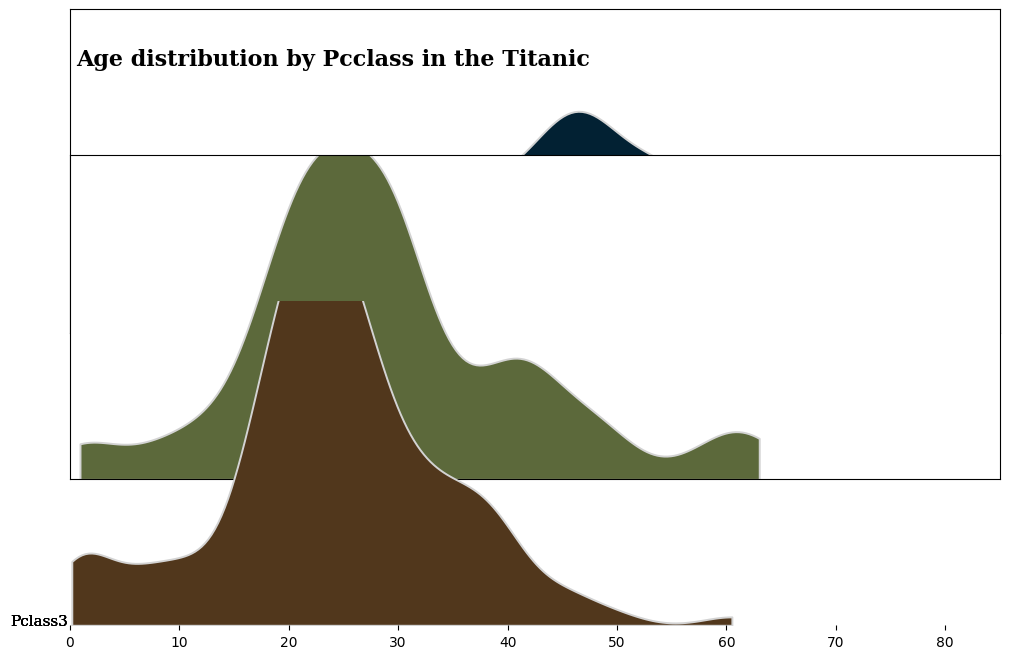

In [29]:
#Ridgeline Plot Visualisation

#setting up the space
fig = plt.figure(figsize=(12, 8))
gs= fig.add_gridspec(3,1)
gs.update(hspace= -0.55)

axes= list()
colors= ["#022133", "#5c693b", "#51371c"]

for idx, cls, c in zip(range(3), sorted(data['Pclass'].unique()), colors ):
    axes.append(fig.add_subplot(gs[idx, 0]))

    sns.kdeplot(x='Age', data=data[data['Pclass']==cls], fill=True, ax=axes[idx], cut=0, bw_method=0.25, lw=1.4, edgecolor= 'lightgray', color=c, alpha=1)
    axes[idx].set_ylim(0, 0.04)
    axes[idx].set_xlim(0, 85)

    axes[idx].set_yticks([])
    if idx != 2: axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')

spines= ['top', 'right', 'left', 'bottom']
for s in spines:
    axes[idx].spines[s].set_visible(False)
    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2, 0, f'Pclass{cls}', fontweight='light', fontfamily='serif', fontsize=11, ha='right')
fig.text(0.13,0.81, "Age distribution by Pcclass in the Titanic", fontweight="bold", fontfamily="serif", fontsize=16)

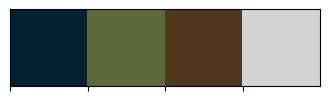

In [30]:

sns.palplot(["#022133", "#5c693b", "#51371c", "lightgray"])

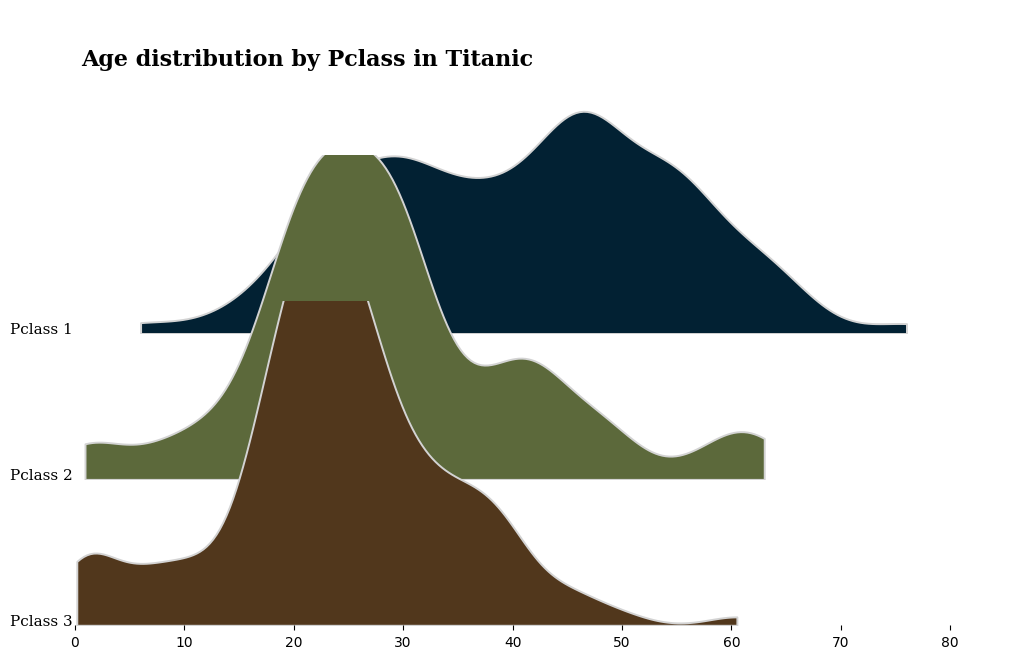

In [31]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.55)

axes = list()
colors = ["#022133", "#5c693b", "#51371c"]

for idx, cls, c in zip(range(3), sorted(data['Pclass'].unique()), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))
    
    # you can also draw density plot with matplotlib + scipy.
    sns.kdeplot(x='Age', data=data[data['Pclass']==cls], 
                fill=True, ax=axes[idx], cut=0, bw_method=0.25, 
                lw=1.4, edgecolor='lightgray',color=c, alpha=1) 
    
    axes[idx].set_ylim(0, 0.04)
    axes[idx].set_xlim(0, 85)
    
    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)
        
    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0,f'Pclass {cls}',fontweight="light", fontfamily='serif', fontsize=11,ha="right")

fig.text(0.13,0.81,"Age distribution by Pclass in Titanic", fontweight="bold", fontfamily='serif', fontsize=16)
plt.show()    



In [32]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


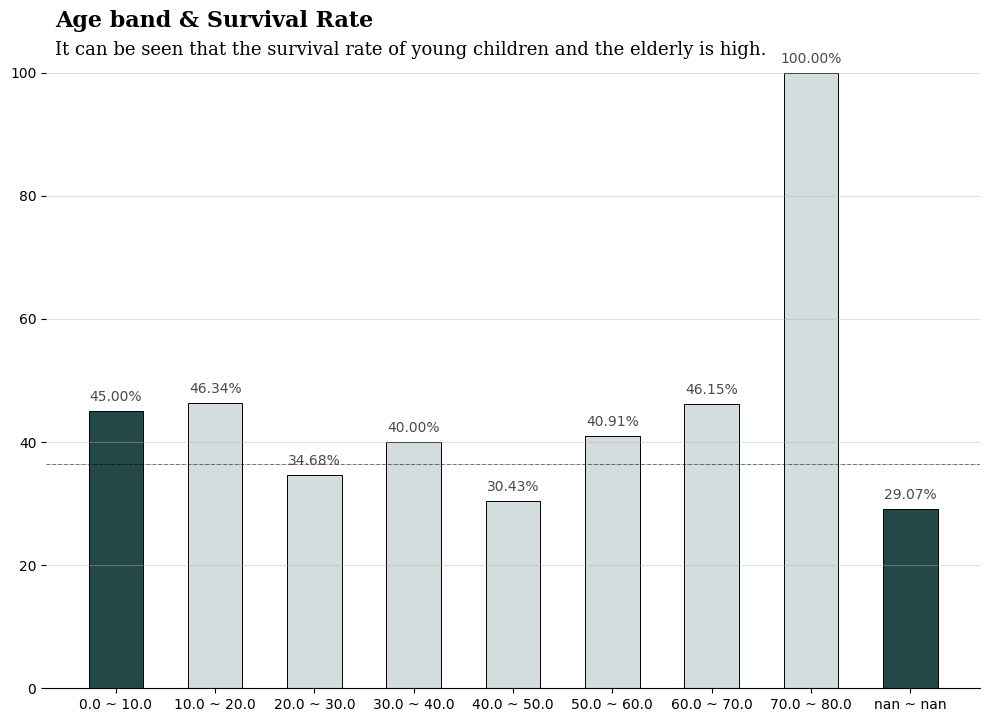

In [130]:
#Barplot Visualisation

#Creating the age band column
def age_band(num):
    lower = (num // 10) * 10
    upper = lower + 10
    return f'{lower} ~ {upper}'
data['age_band']= data['Age'].apply(age_band)

#Calculaing the survival rate
titanic_age=data[['age_band', 'Survived']].groupby('age_band')['Survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['Survival rate']= titanic_age[1]/(titanic_age[0] +titanic_age[1])*100

#Plotting
fig, ax= plt.subplots(1,1, figsize=(10, 7))
color_map= ["#d4dddd" for _ in range(9)]
color_map[0]= color_map[8]= '#244747'  #for the color highlight

ax.bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], color=color_map, width=0.55, edgecolor='black', linewidth=0.7)
for s in ['top', 'right', 'left']:
    ax.spines[s].set_visible(False)

#Annotation
for i in titanic_age['Survival rate'].index:
    ax.annotate(f"{titanic_age['Survival rate'][i]:.02f}%", xy=(i, titanic_age['Survival rate'][i]+2.3), va='center', ha='center', fontweight='light', color='#4a4a4a')

#mean line 
mean= data['Survived'].mean() *100
ax.axhline(mean, color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean:{mean :.4}%", xy=('20 ~ 30', mean+4), va='center', ha='center', color='#4a4a4a', bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))

#Title 
fig.text(0.06, 1, 'Age band & Survival Rate', fontsize=16, fontweight= 'bold', fontfamily='serif')
fig.text(0.06, 0.96, 'It can be seen that the survival rate of young children and the elderly is high.', fontsize=13, fontweight= 'light', fontfamily='serif')


grid_y_ticks= np.arange(0,101,20)
ax.set_yticks(grid_y_ticks) 
ax.grid(axis='y', linestyle= '-', alpha=0.4)

plt.tight_layout()


In [ ]:
c= [val for val in range(80, 91)]
for val in c:
    if val in data.Age:
        print('g')
        print(val)

g
80
g
81
g
82
g
83
g
84
g
85
g
86
g
87
g
88
g
89
g
90


In [128]:
mean= data['Survived'].mean() *100
mean

np.float64(36.36363636363637)

In [109]:
index= ['0.0 ~ 10.0' ,'10.0 ~ 20.0',	'20.0 ~ 30.0',	'30.0 ~ 40.0',	'40.0 ~ 50.0',	'50.0 ~ 60.0',	'60.0 ~ 70.0',	'70.0 ~ 80.0',	'80 ~ 90'	]
titanic_age

Survived,0,1,Survival rate
0.0 ~ 10.0,11.0,9.0,45.000000
10.0 ~ 20.0,22.0,19.0,46.341463
20.0 ~ 30.0,81.0,43.0,34.677419
30.0 ~ 40.0,39.0,26.0,40.000000
40.0 ~ 50.0,32.0,14.0,30.434783
50.0 ~ 60.0,13.0,9.0,40.909091
60.0 ~ 70.0,7.0,6.0,46.153846
70.0 ~ 80.0,0.0,1.0,100.000000
80 ~ 90,61.0,25.0,29.069767


In [46]:
data['Survived'].value_counts()
data.age_band.unique()

array(['30.0 ~ 40.0', '40.0 ~ 50.0', '60.0 ~ 70.0', '20.0 ~ 30.0',
       '10.0 ~ 20.0', 'nan ~ nan', '50.0 ~ 60.0', '0.0 ~ 10.0',
       '70.0 ~ 80.0'], dtype=object)

In [65]:
data.groupby('age_band')['Survived'].value_counts().sort_index().unstack().fillna(0)

Survived,0,1
age_band,,
0.0 ~ 10.0,11.0,9.0
10.0 ~ 20.0,22.0,19.0
20.0 ~ 30.0,81.0,43.0
30.0 ~ 40.0,39.0,26.0
40.0 ~ 50.0,32.0,14.0
50.0 ~ 60.0,13.0,9.0
60.0 ~ 70.0,7.0,6.0
70.0 ~ 80.0,0.0,1.0
nan ~ nan,61.0,25.0


In [61]:
data.Survived.value_counts()

Survived
0    266
1    152
Name: count, dtype: int64